# DESCRIPTION
Reduce the time a Mercedes-Benz spends on the test bench.

## Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

## Following actions should be performed:
If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
Check for null and unique values for test and train sets.
Apply label encoder.
Perform dimensionality reduction.
Predict your test_df values using XGBoost

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import io
%cd "D:\Mercedes\Mercedes"

D:\Mercedes\Mercedes


In [3]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [4]:
train_df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    0    1    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    0   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  \
0    0    1    0    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    1    0    0    0    0    0    0    0    1    0    0    0    1    0   
2    1    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
3    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   
4    0    0    0    0    0    0    0    0    0    1    1    1    0    1    0   

   X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  \
0    0    0    1    0    1    0    0    0    0    0    0    0    0    1    0   
1    0    0    1    0    1    0    0    0    0    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   
4    0    0    1    0    1    0    0    0    0    0    1    0    0    1    0   

   X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  \
0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
1    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2    0    0    0    1    0    0    1    0    0    0    1    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    1    0   
4    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   

   X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  \
0    0    0    0    0    0    1    0    1    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    1    0    0    0    0   
2    0    0    0    0    0    1    0    1    1    0    1    1    1    0    0   
3    0    0    0    0    0    0    0    1    1    0    1    0    1    0    0   
4    0    0    0    0    0    0    0    1    0    0    1    0    1    0    0   

   X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    1    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    1    0    0    0    1    1    0    0    0    0    0    0    0    0   
3    0    1    0    0    0    1    0    0    0    0    0    0    0    0    0   
4    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  \
0    0    0    0    0    0    0     0     0     0     0     0     0     0   
1    0    0    1    0    1    0     1     1     0     0     0     0     0   
2    0    0    1    0    1    0     0     1     0     0     0     0     0   
3    0    0    1    0    1    0     0     1     0     0     0     0     0   
4    0    0    1    0    1    0     0     1     0     0     0     0     0   

   X107  X108  X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  \
0     0     0     0     0     1     0     0     1     0     1     0     1   
1     0     0     0     0     1     0     0     0     0     0     0     1   
2     0     0     0     0     1     0     0     0     0     0     0     0   
3     0     1     0     0     1     0     0     1     0     0     0     0   
4     0     1     0     0     1     0     0     1     0     0     0     0   

   X119  X120  X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  \
0     1     1     0     0     0     0     0     0     1     0     0     1   
1     1     1     0     0     0     0     0     1

In [5]:
train_df.shape

(4209, 378)

In [6]:
test_df.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  X18  \
0   1  az  v   n  f  d  t  a  w    0    0    0    0    0    0    0    0    0   
1   2   t  b  ai  a  d  b  g  y    0    0    0    0    0    0    0    0    0   
2   3  az  v  as  f  d  a  j  j    0    0    0    0    1    0    0    0    0   
3   4  az  l   n  f  d  z  l  n    0    0    0    0    0    0    0    0    0   
4   5   w  s  as  c  d  y  i  m    0    0    0    0    1    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
1    1    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    0    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    1    1    0    0    1   
2    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
1    1    1    0    0    0    0    0    0    1    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    0    0    0    0    1    0    0    1    0    0    1   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
3    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  X95  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  X108  \
0    1    0    1    0     0     1     0     0     0     0     0     0     0   
1    0    0    1    0     0     1     0     1     0     0     0     0     0   
2    1    0    1    0     1     1     0     1     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     0     0   
4    1    0    1    0     1     1     0     1     0     0     1     0     0   

   X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  \
0     0     0     1     0     0     1     0     0     0     0     0     0   
1     0     0     1     0     0     0     0     1     0     1     1     1   
2     0     0     1     0     0     0     0     0     0     0     0     1   
3     0     0     1     0     0     1     0     0     0     0     0     1   
4     0     0     1     0     0     0     0     0     0     1     1     1   

   X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  \
0     0     0     0     0     0     0     1     0     0     0     1     0   
1     0     0     0     0

In [7]:
##If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

In [8]:
L=[]
for i in train_df.columns[10:]:
    if train_df[i].var() ==0:
        L.append(i)
print(L)
#These are the columns with variance is 0


['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']


In [9]:
train_df=train_df.drop(L,axis=1)

In [10]:
train_df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  \
0    0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    0    1    0     1     1     0     0     0     0     0     0     0   
2    1    0    1    0     0     1     0     0     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     1     0   
4    1    0    1    0     0     1     0     0     0     0     0     1     0   

   X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  \
0     0     1     0     0     1     0     1     0     1     1     1     0   
1     0     1     0     0     0     0     0     0     1     1     1     0   
2     0     1     0     0     0     0     0     0     0     0     1     0   
3     0     1     0     0     1     0     0     0     0     0     1     0   
4     0     1     0     0     1     0     0     0     0     0     1     0   

   X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  \
0     0     0     0     0     0     1     0     0     1     0     0     0   
1     0     0     0     0     1     1

In [11]:
train_df.shape

(4209, 366)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

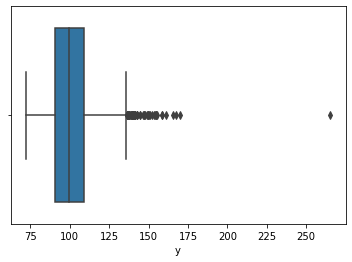

In [12]:
sns.boxplot(train_df["y"])
#there is one value which is extremely out of trend so we have to remove this outliers

In [13]:
train_df.loc[train_df["y"]==train_df["y"].max()]

ID       y X0 X1  X2 X3 X4  X5 X6 X8  X10  X12  X13  X14  X15  X16  \
883  1770  265.32  y  r  ai  f  d  ag  l  t    0    0    0    0    0    0   

     X17  X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  \
883    0    0    1    0    0    0    0    0    0    1    0    0    0    1   

     X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  \
883    0    0    0    1    0    1    0    0    0    0    0    0    0    0   

     X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  \
883    1    0    0    0    0    0    0    0    0    0    0    0    1    0   

     X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  \
883    0    1    0    0    0    0    0    0    0    0    0    0    0    1   

     X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  X88  \
883    0    0    0    0    0    1    0    0    0    0    0    0    0    0   

     X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  X101  X102  X103  \
883    0    0    0    0    0    0    0    0    1    0     0     1     0     1   

     X104  X105  X106  X108  X109  X110  X111  X112  X113  X114  X115  X116  \
883     0     0     0     0     0     0     1     0     0     0     1     0   

     X117  X118  X119  X120  X122  X123  X124  X125  X126  X127  X128  X129  \
883     0     0     0     1     0     0     0     0     0     1     1     0   

     X130  X131  X132  X133  X134  X135  X136  X137  X138  X139  X140  X141  \
883     0     0     1     0     0     0     1     1     0     0     0     0   

     X142  X143  X144  X145  X146  X147  X148  X150  X151  X152  X153  X154  \
883     0     0     1     0     0     0     0     0     0     0     0     1   

     X155  X156  X157  X158  X159  X160  X161  X162  X163  X164  X165  X166  \
883     0     1     0     1     0     0     0     0     0     0     0     0   

     X167  X168  X169  X170  X171  X172  X173  X174  X175  X176  X177  X178  \
883     0     1     0     0     0     0     0     0     0     0     0     1   

     X179  X180  X181  X182  X183  X184  X185  X186  X187  X189  X190  X191  \
883     0     0     0     0     0     0     0     1     0     1     0     0   

     X192  X194  X195  X196  X197  X198  X199  X200  X201  X202  X203  X204  \
883     0     0     0     0     0     0     0     0     0     0     0     0   

     X205  X206  X207  X208  X209  X210  X211  X212  X213  X214  X215  X216  \
883     1     0     0     0     1     0     0     0     0     0     1     0   

     X217  X218  X219  X220  X221  X222  X223  X224  X225  X226  X227  X228  \
883     0     0     0     0     0     0     0     0     0     0     0     0   

     X229  X230  X231  X232  X234  X236  X237  X238  X239  X240  X241  X242  \
883     1     0     0     0     1     0     0     1     0     0     0     0   

     X243  X244  X245  X246  X247  X248  X249  X250  X251  X252  X253  X254  \
883     0     0     0     0     0     0     0     1     0     0     0     0   

     X255  X256  X257  X258  X259  X260  X261  X262  X263  X264  X265  X266  \
883     0     0     0     0     0     0     0     0     1     0     1     0   

     X267  X269  X270  X271  X272  X273  X274  X275  X276  X277  X278  X279  \
883     0     0     0     0     0     1     0     0     0     0     0     0   

     X280  X281  X282  X283  X284  X285  X286  X287  X288  X291  X292  X294  \
883     0     0     0     0     0     0     0     0     0     0     0     0   

     X295  X296  X298  X299  X300  X301  X302  X304  X305  X306  X307  X308  \
883     0     0     0     0     0     0     0     1     0     0     0     0   

     X309  X310  X311  X312  X313  X314  X315  X316  X317  X318  X319  X320  \
883     0     0     0     0     1     0     0     0     0     0     0     0   

     X321  X322  X323  X324  X325  X326  X327  X328  X329  X331  X332  X333  \
883     1     0     0     1     0     0     0     0     0     0     0     0   

     X334  X335  X336  X337  X338  X339  X340  X341 

In [14]:
train_df=train_df.drop(883)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y'>

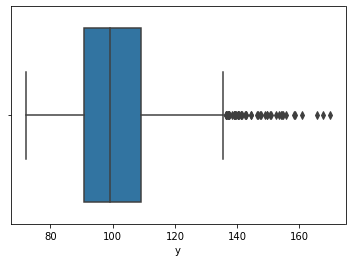

In [15]:
sns.boxplot(train_df["y"])

In [16]:
train_df.shape

(4208, 366)

In [17]:
train_df.isnull().sum().sort_values(ascending=False)
#No Null value in our data

ID      0
X262    0
X260    0
X259    0
X258    0
X257    0
X256    0
X255    0
X254    0
X253    0
X252    0
X251    0
X250    0
X249    0
X248    0
X247    0
X246    0
X245    0
X244    0
X243    0
X242    0
X261    0
X263    0
X240    0
X264    0
X284    0
X283    0
X282    0
X281    0
X280    0
X279    0
X278    0
X277    0
X276    0
X275    0
X274    0
X273    0
X272    0
X271    0
X270    0
X269    0
X267    0
X266    0
X265    0
X241    0
X239    0
X286    0
X214    0
X212    0
X211    0
X210    0
X209    0
X208    0
X207    0
X206    0
X205    0
X204    0
X203    0
X202    0
X201    0
X200    0
X199    0
X198    0
X197    0
X196    0
X195    0
X194    0
X213    0
X215    0
X238    0
X216    0
X237    0
X236    0
X234    0
X232    0
X231    0
X230    0
X229    0
X228    0
X227    0
X226    0
X225    0
X224    0
X223    0
X222    0
X221    0
X220    0
X219    0
X218    0
X217    0
X285    0
X287    0
y       0
X362    0
X360    0
X359    0
X358    0
X357    0
X356    0
X355    0


In [18]:
test_df.isnull().sum().sort_values(ascending=False)
#no Null value in test data as well

ID      0
X255    0
X264    0
X263    0
X262    0
X261    0
X260    0
X259    0
X258    0
X257    0
X256    0
X254    0
X266    0
X253    0
X252    0
X251    0
X250    0
X249    0
X248    0
X247    0
X246    0
X245    0
X265    0
X267    0
X196    0
X279    0
X288    0
X287    0
X286    0
X285    0
X284    0
X283    0
X282    0
X281    0
X280    0
X278    0
X268    0
X277    0
X276    0
X275    0
X274    0
X273    0
X272    0
X271    0
X270    0
X269    0
X244    0
X243    0
X242    0
X208    0
X217    0
X216    0
X215    0
X214    0
X213    0
X212    0
X211    0
X210    0
X209    0
X207    0
X241    0
X206    0
X205    0
X204    0
X203    0
X202    0
X201    0
X200    0
X199    0
X198    0
X218    0
X219    0
X220    0
X221    0
X240    0
X239    0
X238    0
X237    0
X236    0
X235    0
X234    0
X233    0
X232    0
X231    0
X230    0
X229    0
X228    0
X227    0
X226    0
X225    0
X224    0
X223    0
X222    0
X289    0
X290    0
X291    0
X351    0
X360    0
X359    0
X358    0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

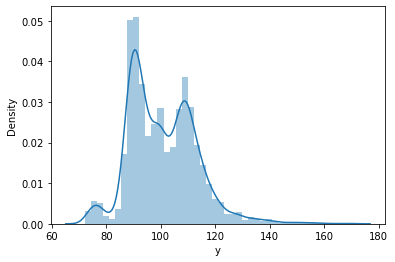

In [19]:
sns.distplot(train_df["y"])

In [20]:
train_df.head()

ID       y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  \
0   0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0   
1   6   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0   
2   7   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1   
3   9   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0   
4  13   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0   

   X18  X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  \
0    1    0    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    1    0    0    0    0    0    0    0    1    0    0    0    1    0    0   
2    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
3    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   
4    0    0    0    0    0    0    0    0    1    1    1    0    1    0    0   

   X34  X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  \
0    0    1    0    1    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    1    0    0    0    0    0    0    0    0    0    0    0   
2    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   
4    0    1    0    1    0    0    0    0    0    1    0    0    1    0    0   

   X49  X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  \
0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    0    0    0    0    1    0    0   
2    0    0    1    0    0    1    0    0    0    1    0    0    1    0    0   
3    0    0    0    0    0    1    0    0    0    0    0    0    1    0    0   
4    0    0    1    0    0    1    0    0    0    0    0    0    1    0    0   

   X64  X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  \
0    0    0    0    0    1    0    1    0    0    1    0    0    0    0    0   
1    0    0    0    0    0    0    1    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    1    1    0    1    1    1    0    0    0   
3    0    0    0    0    0    0    1    1    0    1    0    1    0    0    0   
4    0    0    0    0    0    0    1    0    0    1    0    1    0    0    0   

   X80  X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
1    1    0    0    0    0    1    0    0    0    0    0    0    0    0    0   
2    1    0    0    0    1    1    0    0    0    0    0    0    0    0    0   
3    1    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  \
0    0    0    0    0     0     0     0     0     0     0     0     0     0   
1    1    0    1    0     1     1     0     0     0     0     0     0     0   
2    1    0    1    0     0     1     0     0     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     1     0   
4    1    0    1    0     0     1     0     0     0     0     0     1     0   

   X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  \
0     0     1     0     0     1     0     1     0     1     1     1     0   
1     0     1     0     0     0     0     0     0     1     1     1     0   
2     0     1     0     0     0     0     0     0     0     0     1     0   
3     0     1     0     0     1     0     0     0     0     0     1     0   
4     0     1     0     0     1     0     0     0     0     0     1     0   

   X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  \
0     0     0     0     0     0     1     0     0     1     0     0     0   
1     0     0     0     0     1     1

In [21]:
train_df.drop(["ID"],axis=1,inplace=True)
    

In [22]:
train_df.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  \
0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0    1   
1   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1   
2   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1    0   
3   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0   
4   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    1    0    0    0    0    0    0    1    0    0    0   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    1    0    1    0    0    1    0    0    0    0    0    0   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    1    0    1    1    0    1    1    1    0    0    0    1   
3    0    0    0    0    0    1    1    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   
2    0    0    0    1    1    0    0    0    0    0    0    0    0    0    1   
3    0    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
0    0    0    0     0     0     0     0     0     0     0     0     0     0   
1    0    1    0     1     1     0     0     0     0     0     0     0     0   
2    0    1    0     0     1     0     0     0     0     0     0     0     0   
3    0    1    0     0     1     0     0     0     0     0     1     0     0   
4    0    1    0     0     1     0     0     0     0     0     1     0     0   

   X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
0     1     0     0     1     0     1     0     1     1     1     0     0   
1     1     0     0     0     0     0     0     1     1     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     1     0     0     0     0     0     1     0     0   
4     1     0     0     1     0     0     0     0     0     1     0     0   

   X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
0     0     0     0     0     1     0     0     1     0     0     0     0   
1     0     0     0     1     

In [23]:
object_col=train_df.select_dtypes("O")

In [24]:
object_col

X0  X1  X2 X3 X4  X5 X6 X8
0      k   v  at  a  d   u  j  o
1      k   t  av  e  d   y  l  o
2     az   w   n  c  d   x  j  x
3     az   t   n  f  d   x  l  e
4     az   v   n  f  d   h  d  n
5      t   b   e  c  d   g  h  s
6     al   r   e  f  d   f  h  s
7      o   l  as  f  d   f  j  a
8      w   s  as  e  d   f  i  h
9      j   b  aq  c  d   f  a  e
10     h   r   r  f  d   f  h  p
11    al   r   e  f  d   f  h  o
12     s   b  ai  c  d   f  g  m
13    al   r   e  f  d   j  h  o
14     o   s  as  e  d   j  g  m
15     n   l  ak  f  d   j  d  k
16    al   r   e  f  d   j  h  o
17    ay  aa  as  c  d   j  c  d
18     f   c   m  c  d   j  d  e
19     n   a  ak  f  d   j  i  s
20     f   s   m  c  d   j  j  i
21     t  aa  as  d  d   j  j  s
22     x   r   a  b  d   j  j  o
23     x   b   m  c  d   j  j  n
24     y   r  ak  d  d   j  d  s
25     o   s   m  c  d   j  i  v
26    aj   l  as  f  d   j  g  j
27     t  aa  as  c  d   j  d  b
28     f   s  as  c  d   j  c  q
29     x   b   m  c  d   j  j  n
30    az   v  as  f  d   j  g  n
31     w   e  as  c  d   j  l  w
32     x   b   m  c  d   j  j  n
33     o   s  as  d  d   j  a  v
34    ak   s  as  c  d   j  j  b
35    am   b  ai  c  d   j  j  o
36    aj   l  as  f  d   j  g  j
37     j   v   k  d  d   j  j  j
38    az   v  as  f  d   j  g  n
39     w   s  as  c  d   j  j  k
40    aj   l  as  f  d   j  i  n
41     o   h  ae  f  d   j  j  b
42     z  aa  ai  c  d   j  g  j
43     w   s  as  c  d   j  i  q
44     s   z  ai  c  d   j  j  b
45     x   b   m  c  d   j  j  n
46    al   r  ai  f  d   j  j  g
47     s  aa   m  c  d   j  g  o
48     q   w  av  f  d   j  i  y
49    at   j  ai  b  d   j  d  i
50     w   w  as  f  d   j  l  e
51    al   r   e  f  d   j  h  o
52    ap   l   s  c  d   j  d  h
53     y   r   r  f  d   j  a  k
54    ay   b  as  c  d   j  j  b
55     o   s   m  c  d   j  d  a
56    ay   o  as  c  d   j  l  l
57     w   u  as  c  d   j  i  s
58     y   v  ai  c  d   j  g  l
59     f   l  ae  f  d   j  d  a
60    ay   b  ak  c  d   j  c  v
61     y  aa   f  c  d   j  g  k
62     y   r  ak  f  d   j  g  b
63    ak   p  ak  c  d   j  d  v
64     x   b  as  c  d   j  j  j
65    az   v   n  f  d   j  i  f
66     s  aa  ai  c  d   j  g  f
67     w   s  as  c  d   j  j  u
68     z  aa  as  c  d   j  j  r
69    aj   s  as  c  d   j  g  a
70     t   r   d  f  d   j  d  t
71    ak   s  as  c  d   j  g  a
72     y   v  ai  c  d   j  g  l
73    az   l   n  f  d   j  j  o
74     t   b   m  c  d   j  g  b
75     v   s  as  c  d   j  g  a
76     o   l  ae  f  d   j  g  b
77     x   b  as  c  d   j  j  j
78     w   e  as  c  d   j  i  l
79    al   r   e  f  d   j  h  o
80     s   b   m  c  d   j  j  b
81    af   n  as  d  d   j  j  h
82     o   l  as  f  d   j  g  a
83    ay   i  as  c  d   j  j  k
84     f   c   m  c  d   j  g  e
85     j   v   k  d  d   j  j  j
86    aj   s  as  c  d   j  a  x
87     z  aa  ai  c  d   j  g  r
88     o   s  as  c  d   j  j  m
89     n   l  as  b  d   j  g  t
90     x   b   m  c  d   j  j  n
91    az   y  as  c  d   j  j  q
92     a   v   k  c  d   j  j  a
93     f   c   m  c  d   j  d  e
94     x  aa  as  c  d   j  d  s
95     x   b   m  c  d   j  j  n
96     n   l  as  f  d   j  d  n
97     x  aa  as  d  d   j  i  s
98     x   b   m  c  d   j  j  n
99     f   s   m  c  d   j  j  a
100    x  aa  as  c  d   j  l  n
101    y   d  ak  f  d   j  g  x
102    y  aa  ae  c  d   j  a  k
103    y   o  ag  f  d   j  j  i
104    f   s   m  c  d   j  g  a
105    x   r  as  f  d   j  j  r
106    x   b   m  c  d   j  j  n
107    e   l  as  f  d   j  d  l
108   ai   b  ai  c  d   j  j  n
109   af   s  as  d  d   j  j  x
110    y   v  ai  c  d   j  g  l
111   ak   a  as  b  d   j  l  p
112   aj   l  as  f  d   j  d  j
113    y   o  as  f  d   j  l  f
114    w   s  as  c  d   j  g  m
115    z  aa  ay  c  d   j  l  s
116    z   v  ae  c  d   j  d  r
117   aj   l  as  f  d   j  l  j
118   ak   h  as  d  d   j  i  a
119   ak   c  as  c  d   j  a  j
120   al   r 

In [25]:
counts_x0=object_col["X0"].value_counts()
counts_x1=object_col["X1"].value_counts()
counts_x2=object_col["X2"].value_counts()
counts_x3=object_col["X3"].value_counts()
counts_x4=object_col["X4"].value_counts()
counts_x5=object_col["X5"].value_counts()
counts_x6=object_col["X6"].value_counts()
counts_x8=object_col["X8"].value_counts()

In [26]:
threshold_x0=40
threshold_x1=40
threshold_x2=40
threshold_x3=40
threshold_x4=40
threshold_x5=90
threshold_x6=90
threshold_x8=100

In [27]:
repl_x0 = counts_x0[counts_x0 <= threshold_x0].index
repl_x1 = counts_x1[counts_x1 <= threshold_x1].index
repl_x2 = counts_x2[counts_x2 <= threshold_x2].index
repl_x3 = counts_x3[counts_x3 <= threshold_x3].index
repl_x4 = counts_x4[counts_x4 <= threshold_x4].index
repl_x5 = counts_x5[counts_x5 <= threshold_x5].index
repl_x6 = counts_x6[counts_x6 <= threshold_x6].index
repl_x8 = counts_x8[counts_x8 <= threshold_x8].index

In [28]:
df_X0=pd.get_dummies(object_col['X0'].replace(repl_x0, 'Other_X0'),drop_first=True,prefix="x0_")
df_X1=pd.get_dummies(object_col['X1'].replace(repl_x1, 'Other_X1'),drop_first=True,prefix="x1_")
df_X2=pd.get_dummies(object_col['X2'].replace(repl_x2, 'Other_X2'),drop_first=True,prefix="x2_")
df_X3=pd.get_dummies(object_col['X3'].replace(repl_x3, 'Other_X3'),drop_first=True,prefix="x3_")
df_X4=pd.get_dummies(object_col['X4'].replace(repl_x4, 'Other_X4'),drop_first=True,prefix="x4_")
df_X5=pd.get_dummies(object_col['X5'].replace(repl_x5, 'Other_X5'),drop_first=True,prefix="x5_")
df_X6=pd.get_dummies(object_col['X6'].replace(repl_x6, 'Other_X6'),drop_first=True,prefix="x6_")
df_X8=pd.get_dummies(object_col['X8'].replace(repl_x8, 'Other_X8'),drop_first=True,prefix="x8_")


In [29]:
object_col1=pd.concat([df_X0,df_X1,df_X2,df_X3,df_X4,df_X5,df_X6,df_X8],axis=1)

In [30]:
train_df=pd.concat([train_df,object_col1],axis=1)

In [31]:
train_df.head()

y  X0 X1  X2 X3 X4 X5 X6 X8  X10  X12  X13  X14  X15  X16  X17  X18  \
0  130.81   k  v  at  a  d  u  j  o    0    0    1    0    0    0    0    1   
1   88.53   k  t  av  e  d  y  l  o    0    0    0    0    0    0    0    1   
2   76.26  az  w   n  c  d  x  j  x    0    0    0    0    0    0    1    0   
3   80.62  az  t   n  f  d  x  l  e    0    0    0    0    0    0    0    0   
4   78.02  az  v   n  f  d  h  d  n    0    0    0    0    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    0    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
2    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1    0    1    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    1    0    0    0    0    0    0    1    0    0    0   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    1    0    1    0    0    1    0    0    0    0    0    0   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    1    0    1    1    0    1    1    1    0    0    0    1   
3    0    0    0    0    0    1    1    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    1    0    0    0    0    0    0    0    0    0    1   
2    0    0    0    1    1    0    0    0    0    0    0    0    0    0    1   
3    0    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1   

   X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
0    0    0    0     0     0     0     0     0     0     0     0     0     0   
1    0    1    0     1     1     0     0     0     0     0     0     0     0   
2    0    1    0     0     1     0     0     0     0     0     0     0     0   
3    0    1    0     0     1     0     0     0     0     0     1     0     0   
4    0    1    0     0     1     0     0     0     0     0     1     0     0   

   X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
0     1     0     0     1     0     1     0     1     1     1     0     0   
1     1     0     0     0     0     0     0     1     1     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     1     0     0     0     0     0     1     0     0   
4     1     0     0     1     0     0     0     0     0     1     0     0   

   X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
0     0     0     0     0     1     0     0     1     0     0     0     0   
1     0     0     0     1     

In [32]:
train_df.shape

(4208, 467)

In [33]:
train_df=train_df.drop(object_col.columns,axis=1)

In [34]:
train_df.head()

y  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  \
0  130.81    0    0    1    0    0    0    0    1    0    0    1    0    0   
1   88.53    0    0    0    0    0    0    0    1    0    0    0    0    0   
2   76.26    0    0    0    0    0    0    1    0    0    0    0    0    0   
3   80.62    0    0    0    0    0    0    0    0    0    0    0    0    0   
4   78.02    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
0    0    0    0    0    0    0    1    0    0    0    1    0    1    0    0   
1    0    0    1    0    0    0    1    0    0    0    1    0    1    0    0   
2    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
3    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
4    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   

   X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   
3    0    0    0    1    0    0    1    0    0    0    0    0    0    0    1   
4    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   

   X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  \
0    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
1    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   

   X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  \
0    1    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
1    1    0    0    1    0    0    0    0    0    1    0    0    0    0    1   
2    1    1    0    1    1    1    0    0    0    1    0    0    0    1    1   
3    1    1    0    1    0    1    0    0    0    1    0    0    0    1    0   
4    1    0    0    1    0    1    0    0    0    1    0    0    0    0    0   

   X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
1    0    0    0    0    0    0    0    0    0    1    0    1    0     1   
2    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
3    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
4    0    0    0    0    0    0    0    0    0    1    0    1    0     0   

   X101  X102  X103  X104  X105  X106  X108  X109  X110  X111  X112  X113  \
0     0     0     0     0     0     0     0     0     0     1     0     0   
1     1     0     0     0     0     0     0     0     0     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     0     0     0     1     0     0     1     0     0   
4     1     0     0     0     0     0     1     0     0     1     0     0   

   X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  \
0     1     0     1     0     1     1     1     0     0     0     0     0   
1     0     0     0     0     1     1     1     0     0     0     0     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     0     0     0   
4     1     0     0     0     0     0     1     0     0     0     0     0   

   X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  \
0     0     1     0     0     1     0     0     0     0     1     1     0   
1     1     1     0     0     0     1     0     0     0     1     0     0   
2

In [35]:
train_df.shape

(4208, 459)

In [36]:
test_df.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  X18  \
0   1  az  v   n  f  d  t  a  w    0    0    0    0    0    0    0    0    0   
1   2   t  b  ai  a  d  b  g  y    0    0    0    0    0    0    0    0    0   
2   3  az  v  as  f  d  a  j  j    0    0    0    0    1    0    0    0    0   
3   4  az  l   n  f  d  z  l  n    0    0    0    0    0    0    0    0    0   
4   5   w  s  as  c  d  y  i  m    0    0    0    0    1    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
1    1    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    0    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    1    1    0    0    1   
2    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
1    1    1    0    0    0    0    0    0    1    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    0    0    0    0    1    0    0    1    0    0    1   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
3    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  X95  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  X108  \
0    1    0    1    0     0     1     0     0     0     0     0     0     0   
1    0    0    1    0     0     1     0     1     0     0     0     0     0   
2    1    0    1    0     1     1     0     1     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     0     0   
4    1    0    1    0     1     1     0     1     0     0     1     0     0   

   X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  \
0     0     0     1     0     0     1     0     0     0     0     0     0   
1     0     0     1     0     0     0     0     1     0     1     1     1   
2     0     0     1     0     0     0     0     0     0     0     0     1   
3     0     0     1     0     0     1     0     0     0     0     0     1   
4     0     0     1     0     0     0     0     0     0     1     1     1   

   X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  \
0     0     0     0     0     0     0     1     0     0     0     1     0   
1     0     0     0     0

In [37]:
Objcol_test=test_df.select_dtypes("O")

In [38]:
Objcol_test

X0  X1  X2 X3 X4  X5 X6 X8
0     az   v   n  f  d   t  a  w
1      t   b  ai  a  d   b  g  y
2     az   v  as  f  d   a  j  j
3     az   l   n  f  d   z  l  n
4      w   s  as  c  d   y  i  m
5      y  aa  ai  e  d   x  g  s
6      x   b  ae  d  d   x  d  y
7      f   s  ae  c  d   h  d  a
8     ap   l   s  c  d   h  j  n
9      o   v  as  f  d   g  f  v
10    ap   l   s  c  d   g  d  n
11    ay   b   b  a  d   g  l  r
12    al   r   e  f  d   g  h  o
13     o   v  ae  g  d   g  g  j
14     h   a  ak  f  d   g  l  t
15    al   r   e  f  d   g  h  s
16    ap   l   s  c  d   g  d  h
17    al   r   e  f  d   f  h  o
18     z   i  ai  a  d   f  l  c
19     y   r  as  f  d   f  d  c
20    al   r   e  f  d   f  h  o
21    al   r   e  f  d   f  h  o
22     z   v  ai  e  d   f  j  m
23    al   r   e  f  d   j  h  o
24     y   b  ai  c  d   j  g  k
25    ap   l   s  c  d   j  j  w
26    ay  aa   m  c  d   j  g  t
27    ay   a  as  d  d   j  l  h
28     f   s   m  c  d   j  g  a
29    az   p  as  f  d   j  g  a
30     w   s  as  c  d   j  g  h
31     t  aa  as  c  d   j  j  s
32    aj   s  as  c  d   j  i  v
33     z   v   a  b  d   j  j  o
34     d  aa  aq  c  d   j  j  w
35     x  aa  as  c  d   j  j  p
36     o   c  ae  c  d   j  d  u
37     h   a  ak  f  d   j  l  u
38     z   r  ag  f  d   j  i  d
39     z   r  ae  c  d   j  a  s
40     d   b  as  c  d   j  j  g
41     o   s   m  c  d   j  i  a
42     d  aa  aq  c  d   j  j  b
43     v   l  as  f  d   j  j  q
44    ap   c   s  c  d   j  i  p
45     o   s   m  c  d   j  g  v
46     h   a  ak  f  d   j  l  u
47     f   s  as  c  d   j  d  g
48    ay   r  as  f  d   j  j  w
49    ak   l  as  f  d   j  j  e
50    al   r   e  f  d   j  h  o
51     x   b   m  c  d   j  j  n
52     t  aa   m  c  d   j  g  b
53     z  aa  as  c  d   j  d  b
54     v   s  as  c  d   j  l  b
55    ba   b  ai  c  d   j  g  d
56    ak   v  as  d  d   j  i  y
57     y   v  ai  c  d   j  g  l
58     w   s  as  c  d   j  d  n
59     t  aa  as  c  d   j  d  b
60    ay   i  as  c  d   j  j  k
61     x   b   m  c  d   j  j  n
62     n   l  ak  f  d   j  d  s
63     j  aa  as  c  d   j  g  b
64     z   b   r  c  d   j  a  f
65     w   l  as  f  d   j  i  n
66     w   c  as  c  d   j  h  t
67     s   b   m  c  d   j  g  s
68    af   l  as  c  d   j  a  y
69     x   b   m  c  d   j  j  n
70     y  aa  as  d  d   j  d  s
71    ak   s  as  d  d   j  g  v
72     y   r  ai  c  d   j  j  g
73     w   c  as  c  d   j  l  c
74    ax   l  as  f  d   j  j  o
75     j   v   k  d  d   j  i  j
76     h   b  as  c  d   j  d  h
77    ay   o  as  d  d   j  j  t
78     o   l  ae  f  d   j  g  j
79     t  aa  as  c  d   j  d  s
80    af   m  as  d  d   j  j  k
81    ak   l  as  f  d   j  i  q
82     y   z  ai  c  d   j  g  s
83    ak   l  ae  f  d   j  g  b
84    al   r  ai  f  d   j  j  g
85    ak   l  as  f  d   j  j  u
86     y   v  ai  c  d   j  g  l
87    ak   s  as  c  d   j  h  a
88     z  aa  aj  c  d   j  j  m
89     s   b  ae  c  d   j  a  e
90    ap   l   s  c  d   j  j  w
91     w   c  as  c  d   j  j  f
92     y   r  ai  c  d   j  l  k
93     x  aa  as  d  d   j  i  s
94     o   c  ak  c  d   j  g  a
95     x   b   m  c  d   j  j  n
96     x   b   m  c  d   j  j  n
97     x  aa  as  c  d   j  g  n
98     o   s   m  c  d   j  i  v
99     f   s   m  c  d   j  i  b
100    n   l  as  f  d   j  i  f
101   at   b  aq  c  d   j  j  y
102    f   c  ae  c  d   j  g  m
103    x  aa  as  e  d   j  j  o
104    n   v  as  f  d   j  j  m
105    x   b   m  c  d   j  j  b
106    z   r  as  d  d   j  l  b
107   ak   l  as  f  d   j  i  i
108    h   a  ak  f  d   j  l  t
109    o   l  ae  f  d   j  d  f
110   ay   b   b  c  d   j  h  r
111   aq   e  as  c  d   j  d  q
112    f   s  as  c  d   j  g  m
113   ay   i  as  c  d   j  j  k
114   ak   h  as  f  d   j  i  q
115   ap   l   s  c  d   j  j  n
116    n   w  ak  f  d   j  d  x
117    j  aa  as  d  d   j  d  o
118    x  aa  as  d  d   j  i  s
119    n   s  as  d  d   j  j  a
120   ak   l 

In [39]:
counts_test_x0=Objcol_test["X0"].value_counts()
counts_test_x1=Objcol_test["X1"].value_counts()
counts_test_x2=Objcol_test["X2"].value_counts()
counts_test_x3=Objcol_test["X3"].value_counts()
counts_test_x4=Objcol_test["X4"].value_counts()
counts_test_x5=Objcol_test["X5"].value_counts()
counts_test_x6=Objcol_test["X6"].value_counts()
counts_test_x8=Objcol_test["X8"].value_counts()

In [40]:
repl_test_x0 = counts_test_x0[counts_test_x0 <= threshold_x0].index
repl_test_x1 = counts_test_x1[counts_test_x1 <= threshold_x1].index
repl_test_x2 = counts_test_x2[counts_test_x2 <= threshold_x2].index
repl_test_x3 = counts_test_x3[counts_test_x3 <= threshold_x3].index
repl_test_x4 = counts_test_x4[counts_test_x4 <= threshold_x4].index
repl_test_x5 = counts_test_x5[counts_test_x5 <= threshold_x5].index
repl_test_x6 = counts_test_x6[counts_test_x6 <= threshold_x6].index
repl_test_x8 = counts_test_x8[counts_test_x8 <= threshold_x8].index

In [41]:
df_test_X0=pd.get_dummies(Objcol_test['X0'].replace(repl_test_x0, 'Other_X0'),drop_first=True,prefix="x0_")
df_test_X1=pd.get_dummies(Objcol_test['X1'].replace(repl_test_x1, 'Other_X1'),drop_first=True,prefix="x1_")
df_test_X2=pd.get_dummies(Objcol_test['X2'].replace(repl_test_x2, 'Other_X2'),drop_first=True,prefix="x2_")
df_test_X3=pd.get_dummies(Objcol_test['X3'].replace(repl_test_x3, 'Other_X3'),drop_first=True,prefix="x3_")
df_test_X4=pd.get_dummies(Objcol_test['X4'].replace(repl_test_x4, 'Other_X4'),drop_first=True,prefix="x4_")
df_test_X5=pd.get_dummies(Objcol_test['X5'].replace(repl_test_x5, 'Other_X5'),drop_first=True,prefix="x5_")
df_test_X6=pd.get_dummies(Objcol_test['X6'].replace(repl_test_x6, 'Other_X6'),drop_first=True,prefix="x6_")
df_test_X8=pd.get_dummies(Objcol_test['X8'].replace(repl_test_x8, 'Other_X8'),drop_first=True,prefix="x8_")


In [42]:
object_col2=pd.concat([df_test_X0,df_test_X1,df_test_X2,df_test_X3,df_test_X4,df_test_X5,df_test_X6,df_test_X8],axis=1)

In [43]:
object_col2.head()

x0__aj  x0__ak  x0__al  x0__ap  x0__ay  x0__az  x0__d  x0__e  x0__f  x0__h  \
0       0       0       0       0       0       1      0      0      0      0   
1       0       0       0       0       0       0      0      0      0      0   
2       0       0       0       0       0       1      0      0      0      0   
3       0       0       0       0       0       1      0      0      0      0   
4       0       0       0       0       0       0      0      0      0      0   

   x0__j  x0__n  x0__o  x0__s  x0__t  x0__w  x0__x  x0__y  x0__z  x1__a  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      1      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      1      0      0      0      0   

   x1__aa  x1__b  x1__c  x1__i  x1__l  x1__o  x1__r  x1__s  x1__v  x1__w  \
0       0      0      0      0      0      0      0      0      1      0   
1       0      1      0      0      0      0      0      0      0      0   
2       0      0      0      0      0      0      0      0      1      0   
3       0      0      0      0      1      0      0      0      0      0   
4       0      0      0      0      0      0      0      1      0      0   

   x2__a  x2__ae  x2__ai  x2__ak  x2__aq  x2__as  x2__ay  x2__e  x2__f  x2__m  \
0      0       0       0       0       0       0       0      0      0      0   
1      0       0       1       0       0       0       0      0      0      0   
2      0       0       0       0       0       1       0      0      0      0   
3      0       0       0       0       0       0       0      0      0      0   
4      0       0       0       0       0       1       0      0      0      0   

   x2__n  x2__r  x2__s  x3__b  x3__c  x3__d  x3__e  x3__f  x3__g  x4__d  \
0      1      0      0      0      0      0      0      1      0      1   
1      0      0      0      0      0      0      0      0      0      1   
2      0      0      0      0      0      0      0      1      0      1   
3      1      0      0      0      0      0      0      1      0      1   
4      0      0      0      0      1      0      0      0      0      1   

   x5__aa  x5__ab  x5__ac  x5__ad  x5__ae  x5__af  x5__ag  x5__c  x5__d  \
0       0       0       0       0       0       0       0      0      0   
1       0       0       0       0       0       0       0      0      0   
2       0       0       0       0       0       0       0      0      0   
3       0       0       0       0       0       0       0      0      0   
4       0       0       0       0       0       0       0      0      0   

   x5__i  x5__j  x5__k  x5__l  x5__m  x5__n  x5__p  x5__q  x5__r  x5__s  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      0      0   
3      0      0      0      0      0      0      0      0      0      0   
4      0      0      0      0      0      0      0      0      0      0   

   x5__v  x5__w  x6__a  x6__d  x6__g  x6__h  x6__i  x6__j  x6__l  x8__a  \
0      0      0      1      0      0      0      0      0      0      0   
1      0      0      0      0      1      0      0      0      0      0   
2      0      0      0      0      0      0      0      1      0      0   
3      0      0      0      0      0      0      0      0      1      0   
4      0      0      0      0      0      0      1      0      0      0   

   x8__b  x8__c  x8__d  x8__e  x8__f  x8__g  x8__h  x8__i  x8__j  x8__k  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0      0      0      0      0      0   
2      0      0      0      0      0      0      0      0      1      0   
3      0      0  

In [44]:
test_df=pd.concat([test_df,object_col2],axis=1)

In [45]:
test_df.head()

ID  X0 X1  X2 X3 X4 X5 X6 X8  X10  X11  X12  X13  X14  X15  X16  X17  X18  \
0   1  az  v   n  f  d  t  a  w    0    0    0    0    0    0    0    0    0   
1   2   t  b  ai  a  d  b  g  y    0    0    0    0    0    0    0    0    0   
2   3  az  v  as  f  d  a  j  j    0    0    0    0    1    0    0    0    0   
3   4  az  l   n  f  d  z  l  n    0    0    0    0    0    0    0    0    0   
4   5   w  s  as  c  d  y  i  m    0    0    0    0    1    0    0    0    0   

   X19  X20  X21  X22  X23  X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  \
0    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
1    1    0    0    0    0    0    0    1    0    0    0    1    0    0    0   
2    0    0    0    0    0    0    0    1    0    1    0    1    0    0    0   
3    0    0    0    0    0    0    0    1    1    1    0    1    0    0    0   
4    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   

   X35  X36  X37  X38  X39  X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  \
0    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
1    1    0    1    0    0    0    0    0    0    0    1    1    0    0    1   
2    1    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
3    1    0    1    0    0    0    0    0    1    0    0    1    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X50  X51  X52  X53  X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  \
0    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
1    1    1    0    0    0    0    0    0    1    0    0    1    0    0    0   
2    0    1    0    0    1    0    0    0    1    0    0    1    0    0    0   
3    0    0    0    0    1    0    0    0    0    0    0    1    0    0    0   
4    0    1    0    0    0    0    0    0    1    0    0    1    0    0    1   

   X65  X66  X67  X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  \
0    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
1    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   
2    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
3    0    0    0    0    0    1    0    0    1    0    1    0    0    0    1   
4    0    0    0    0    0    1    0    0    1    0    0    0    0    0    1   

   X81  X82  X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X93  X94  X95  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   X96  X97  X98  X99  X100  X101  X102  X103  X104  X105  X106  X107  X108  \
0    1    0    1    0     0     1     0     0     0     0     0     0     0   
1    0    0    1    0     0     1     0     1     0     0     0     0     0   
2    1    0    1    0     1     1     0     1     0     0     0     0     0   
3    1    0    1    0     0     1     0     0     0     0     0     0     0   
4    1    0    1    0     1     1     0     1     0     0     1     0     0   

   X109  X110  X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  \
0     0     0     1     0     0     1     0     0     0     0     0     0   
1     0     0     1     0     0     0     0     1     0     1     1     1   
2     0     0     1     0     0     0     0     0     0     0     0     1   
3     0     0     1     0     0     1     0     0     0     0     0     1   
4     0     0     1     0     0     0     0     0     0     1     1     1   

   X122  X123  X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  \
0     0     0     0     0     0     0     1     0     0     0     1     0   
1     0     0     0     0

In [46]:
test_df=test_df.drop(Objcol_test.columns,axis=1)

In [47]:
test_df=test_df.drop(["ID"],axis=1)

In [48]:
train_df.head()

y  X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  \
0  130.81    0    0    1    0    0    0    0    1    0    0    1    0    0   
1   88.53    0    0    0    0    0    0    0    1    0    0    0    0    0   
2   76.26    0    0    0    0    0    0    1    0    0    0    0    0    0   
3   80.62    0    0    0    0    0    0    0    0    0    0    0    0    0   
4   78.02    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X24  X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
0    0    0    0    0    0    0    1    0    0    0    1    0    1    0    0   
1    0    0    1    0    0    0    1    0    0    0    1    0    1    0    0   
2    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
3    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   
4    0    0    1    1    1    0    1    0    0    0    1    0    1    0    0   

   X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  \
0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   
3    0    0    0    1    0    0    1    0    0    0    0    0    0    0    1   
4    0    0    0    1    0    0    1    0    0    0    0    1    0    0    1   

   X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  \
0    0    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
1    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2    0    0    0    1    0    0    1    0    0    0    0    0    0    1    0   
3    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   

   X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  \
0    1    0    0    1    0    0    0    0    0    0    0    0    0    0    1   
1    1    0    0    1    0    0    0    0    0    1    0    0    0    0    1   
2    1    1    0    1    1    1    0    0    0    1    0    0    0    1    1   
3    1    1    0    1    0    1    0    0    0    1    0    0    0    1    0   
4    1    0    0    1    0    1    0    0    0    1    0    0    0    0    0   

   X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0     0   
1    0    0    0    0    0    0    0    0    0    1    0    1    0     1   
2    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
3    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
4    0    0    0    0    0    0    0    0    0    1    0    1    0     0   

   X101  X102  X103  X104  X105  X106  X108  X109  X110  X111  X112  X113  \
0     0     0     0     0     0     0     0     0     0     1     0     0   
1     1     0     0     0     0     0     0     0     0     1     0     0   
2     1     0     0     0     0     0     0     0     0     1     0     0   
3     1     0     0     0     0     0     1     0     0     1     0     0   
4     1     0     0     0     0     0     1     0     0     1     0     0   

   X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  \
0     1     0     1     0     1     1     1     0     0     0     0     0   
1     0     0     0     0     1     1     1     0     0     0     0     0   
2     0     0     0     0     0     0     1     0     0     0     0     0   
3     1     0     0     0     0     0     1     0     0     0     0     0   
4     1     0     0     0     0     0     1     0     0     0     0     0   

   X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  \
0     0     1     0     0     1     0     0     0     0     1     1     0   
1     1     1     0     0     0     1     0     0     0     1     0     0   
2

In [49]:
test_df.head()

X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
2    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

   X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  \
0    0    1    1    1    0    1    0    0    0    1    0    1    0    0    0   
1    0    1    0    0    0    1    0    0    0    1    0    1    0    0    0   
2    0    1    0    1    0    1    0    0    0    1    0    1    0    0    0   
3    0    1    1    1    0    1    0    0    0    1    0    1    0    0    0   
4    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  \
0    0    0    1    0    0    1    0    0    0    0    0    0    0    1    0   
1    0    0    0    0    1    1    0    0    1    1    1    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0    1    0    0    1    0   
3    0    0    1    0    0    1    0    0    0    0    0    0    0    1    0   
4    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0   

   X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  \
0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    1   
1    0    0    1    0    0    1    0    0    0    0    0    0    0    0    1   
2    0    0    1    0    0    1    0    0    0    0    0    0    0    0    1   
3    0    0    0    0    0    1    0    0    0    0    0    0    0    0    1   
4    0    0    1    0    0    1    0    0    1    0    0    0    0    0    1   

   X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  \
0    0    0    1    0    1    0    0    0    1    0    0    0    0    0    0   
1    0    0    1    0    0    0    0    0    1    0    0    0    0    0    0   
2    0    0    1    0    1    0    0    0    1    0    0    0    0    1    0   
3    0    0    1    0    1    0    0    0    1    0    0    0    0    0    0   
4    0    0    1    0    0    0    0    0    1    0    0    0    0    1    0   

   X87  X88  X89  X90  X91  X92  X93  X94  X95  X96  X97  X98  X99  X100  \
0    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
1    0    0    0    0    0    0    0    0    0    0    0    1    0     0   
2    0    0    0    0    0    0    0    0    0    1    0    1    0     1   
3    0    0    0    0    0    0    0    0    0    1    0    1    0     0   
4    0    0    0    0    0    0    0    0    0    1    0    1    0     1   

   X101  X102  X103  X104  X105  X106  X107  X108  X109  X110  X111  X112  \
0     1     0     0     0     0     0     0     0     0     0     1     0   
1     1     0     1     0     0     0     0     0     0     0     1     0   
2     1     0     1     0     0     0     0     0     0     0     1     0   
3     1     0     0     0     0     0     0     0     0     0     1     0   
4     1     0     1     0     0     1     0     0     0     0     1     0   

   X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  X124  X125  \
0     0     1     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     1     0     1     1     1     0     0     0     0   
2     0     0     0     0     0     0     0     1     0     0     0     0   
3     0     1     0     0     0     0     0     1     0     0     0     0   
4     0     0     0     0     0     1     1     1     0     0     0     0   

   X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  X136  X137  \
0     0     0     1     0     0     0     1     0     0     0     0     0   
1     0     1     1     1     0     0     0     1     0     0

In [50]:
train_df.shape

(4208, 459)

In [51]:
test_df.shape

(4209, 470)

In [52]:
Y=train_df["y"]

In [53]:
X=train_df.iloc[:,1:]

In [54]:
X.head()

X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  X26  \
0    0    0    1    0    0    0    0    1    0    0    1    0    0    0    0   
1    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0   
2    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

   X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  X40  X41  \
0    0    0    0    0    1    0    0    0    1    0    1    0    0    0    0   
1    1    0    0    0    1    0    0    0    1    0    1    0    0    0    0   
2    1    1    1    0    1    0    0    0    1    0    1    0    0    0    0   
3    1    1    1    0    1    0    0    0    1    0    1    0    0    0    0   
4    1    1    1    0    1    0    0    0    1    0    1    0    0    0    0   

   X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  X54  X55  X56  \
0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0   
2    0    1    0    0    1    0    0    0    0    1    0    0    1    0    0   
3    0    1    0    0    1    0    0    0    0    0    0    0    1    0    0   
4    0    1    0    0    1    0    0    0    0    1    0    0    1    0    0   

   X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  X68  X69  X70  X71  \
0    0    1    0    0    0    0    0    0    0    0    0    1    0    1    0   
1    0    0    0    0    1    0    0    0    0    0    0    0    0    1    0   
2    0    1    0    0    1    0    0    0    0    0    0    1    0    1    1   
3    0    0    0    0    1    0    0    0    0    0    0    0    0    1    1   
4    0    0    0    0    1    0    0    0    0    0    0    0    0    1    0   

   X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  X83  X84  X85  X86  X87  \
0    0    1    0    0    0    0    0    0    0    0    0    0    1    0    0   
1    0    1    0    0    0    0    0    1    0    0    0    0    1    0    0   
2    0    1    1    1    0    0    0    1    0    0    0    1    1    0    0   
3    0    1    0    1    0    0    0    1    0    0    0    1    0    0    0   
4    0    1    0    1    0    0    0    1    0    0    0    0    0    0    0   

   X88  X89  X90  X91  X92  X94  X95  X96  X97  X98  X99  X100  X101  X102  \
0    0    0    0    0    0    0    0    0    0    0    0     0     0     0   
1    0    0    0    0    0    0    0    1    0    1    0     1     1     0   
2    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
3    0    0    0    0    0    0    0    1    0    1    0     0     1     0   
4    0    0    0    0    0    0    0    1    0    1    0     0     1     0   

   X103  X104  X105  X106  X108  X109  X110  X111  X112  X113  X114  X115  \
0     0     0     0     0     0     0     0     1     0     0     1     0   
1     0     0     0     0     0     0     0     1     0     0     0     0   
2     0     0     0     0     0     0     0     1     0     0     0     0   
3     0     0     0     0     1     0     0     1     0     0     1     0   
4     0     0     0     0     1     0     0     1     0     0     1     0   

   X116  X117  X118  X119  X120  X122  X123  X124  X125  X126  X127  X128  \
0     1     0     1     1     1     0     0     0     0     0     0     1   
1     0     0     1     1     1     0     0     0     0     0     1     1   
2     0     0     0     0     1     0     0     0     0     0     0     1   
3     0     0     0     0     1     0     0     0     0     0     0     1   
4     0     0     0     0     1     0     0     0     0     0     0     1   

   X129  X130  X131  X132  X133  X134  X135  X136  X137  X138  X139  X140  \
0     0     0     1     0     0     0     0     1     1     0     0     0   
1     0     0     0     1     0     0     0     1

In [55]:
X.shape

(4208, 458)

In [56]:
#train test split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [59]:
x_train.head()

X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  \
3830    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
152     0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1557    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
2358    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
1316    0    0    0    0    0    0    0    0    0    0    0    0    0    0   

      X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
3830    0    1    0    0    0    0    0    0    0    0    0    0    1    0   
152     0    0    0    0    0    1    0    0    0    1    0    1    0    0   
1557    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2358    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
1316    0    1    0    0    0    0    0    0    0    0    0    0    0    0   

      X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  \
3830    0    0    0    0    0    0    1    0    0    0    0    1    0    0   
152     0    0    0    0    1    0    1    0    0    0    0    1    0    0   
1557    0    0    0    0    0    1    0    0    0    0    0    0    0    0   
2358    0    0    0    0    0    0    1    0    0    0    1    1    0    0   
1316    0    0    0    0    0    0    0    0    0    0    1    1    0    0   

      X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  \
3830    0    0    0    0    1    0    0    1    0    0    0    0    0    0   
152     0    0    0    0    1    0    0    1    0    0    0    0    1    0   
1557    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
2358    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
1316    0    0    0    0    1    0    0    1    0    0    0    0    0    0   

      X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  \
3830    0    0    1    0    0    1    0    0    0    0    0    1    1    0   
152     1    0    1    0    0    1    0    0    0    0    0    0    0    0   
1557    0    1    0    0    0    1    0    0    0    0    0    1    0    0   
2358    0    0    1    0    0    1    0    0    0    0    0    1    0    0   
1316    0    0    1    0    0    1    0    0    0    0    0    1    0    0   

      X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  \
3830    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
152     0    0    0    0    0    0    0    0    0    0    0    0    1    0   
1557    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
2358    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
1316    0    0    1    0    0    0    0    0    0    0    0    0    1    0   

      X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
3830    1    0     1     1     0     1     0     0     0     0     0     0   
152     0    0     0     0     0     0     0     0     0     0     0     0   
1557    1    0     0     1     0     0     0     0     0     0     0     0   
2358    1    0     1     1     0     1     0     0     0     0     0     0   
1316    1    0     0     1     0     0     0     1     0     0     0     0   

      X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
3830     1     0     0     0     1     0     0     0     0     1     0     0   
152      0     1     0     0     0     1     0     1     1     1     0     0   
1557     1     0     0     0     1     0     0     0     0     1     0     0   
2358     1     0     0     0     0     0     0     1     1     1     0     0   
1316     1     0     0     1     0     0     0     1     1     1     0     0   

      X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
3830     0     0     0     1     1     0     0     0     1     0     0     0   
152      0     0     0     0     0     0     1     0     1     0     0     0   
15

In [60]:
x_test.head()

X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  X21  X22  X23  X24  \
1722    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3550    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
2556    0    0    0    1    0    0    0    0    0    0    0    0    0    0   
4021    0    0    0    0    0    0    0    0    0    1    0    0    0    0   
3954    0    0    0    1    0    0    0    0    0    0    0    0    0    0   

      X26  X27  X28  X29  X30  X31  X32  X33  X34  X35  X36  X37  X38  X39  \
1722    0    1    1    1    0    0    0    0    0    0    0    0    0    0   
3550    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
2556    0    1    0    0    0    0    0    0    0    0    0    0    0    0   
4021    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
3954    0    1    0    0    0    0    0    0    0    0    0    0    1    0   

      X40  X41  X42  X43  X44  X45  X46  X47  X48  X49  X50  X51  X52  X53  \
1722    0    0    0    1    0    0    1    0    0    0    0    0    0    0   
3550    0    0    0    0    0    1    1    0    0    0    1    1    0    0   
2556    0    0    0    0    0    0    0    0    0    0    0    1    0    0   
4021    0    0    0    0    0    0    1    0    0    0    0    1    0    0   
3954    0    0    0    0    0    0    0    0    0    0    0    1    0    0   

      X54  X55  X56  X57  X58  X59  X60  X61  X62  X63  X64  X65  X66  X67  \
1722    1    0    0    0    0    0    0    1    0    0    0    0    0    0   
3550    0    0    0    0    1    0    0    1    0    0    0    0    0    0   
2556    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
4021    0    0    0    0    0    0    0    1    0    0    0    0    0    0   
3954    0    0    0    0    0    0    0    1    0    0    1    0    0    0   

      X68  X69  X70  X71  X73  X74  X75  X76  X77  X78  X79  X80  X81  X82  \
1722    0    0    1    0    0    1    0    1    0    0    0    1    0    0   
3550    0    0    1    0    0    1    0    0    0    0    0    1    1    0   
2556    0    0    1    0    0    1    0    0    0    0    0    1    1    0   
4021    0    0    1    0    0    1    0    0    0    0    0    1    1    0   
3954    0    0    1    0    0    1    0    0    0    0    0    1    0    0   

      X83  X84  X85  X86  X87  X88  X89  X90  X91  X92  X94  X95  X96  X97  \
1722    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
3550    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
2556    0    0    0    0    0    0    0    0    0    0    0    0    1    0   
4021    0    0    1    0    0    0    0    0    0    0    0    0    1    0   
3954    0    0    1    0    0    0    0    0    0    0    0    0    1    0   

      X98  X99  X100  X101  X102  X103  X104  X105  X106  X108  X109  X110  \
1722    1    0     0     1     0     0     0     0     0     1     0     0   
3550    1    0     1     1     0     1     0     0     0     0     0     0   
2556    1    0     1     1     0     1     0     0     0     0     0     0   
4021    1    0     1     1     0     1     0     0     0     0     0     0   
3954    1    0     1     1     0     1     0     0     0     0     0     0   

      X111  X112  X113  X114  X115  X116  X117  X118  X119  X120  X122  X123  \
1722     1     0     0     1     0     0     0     0     0     1     0     0   
3550     1     0     0     0     0     1     0     1     1     1     0     0   
2556     1     0     0     0     0     0     0     1     1     1     0     0   
4021     1     0     0     0     1     0     0     0     0     1     0     0   
3954     1     0     0     0     0     0     0     1     1     1     0     0   

      X124  X125  X126  X127  X128  X129  X130  X131  X132  X133  X134  X135  \
1722     0     0     0     0     1     0     0     0     1     0     0     0   
3550     0     0     0     1     1     0     0     0     0     0     0     0   
25

In [61]:
y_train.head()

3830     89.46
152     108.84
1557    111.15
2358    122.65
1316     94.39
Name: y, dtype: float64

In [62]:
y_test.head()

1722     77.62
3550     93.17
2556    109.02
4021     92.48
3954    113.67
Name: y, dtype: float64

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3366, 458)
(842, 458)
(3366,)
(842,)


In [64]:
#Mean Centering / Standardisation scaling our data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
std=StandardScaler()

In [67]:
x_train_std=std.fit_transform(x_train)

In [68]:
x_test_std=std.transform(x_test)

In [69]:
# Performing dimensionality reduction.

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA(n_components=None)

In [72]:
x_train_trf=pca.fit_transform(x_train_std)

In [73]:
x_test_trf=pca.transform(x_test_std)

In [74]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05877209, 0.10749532, 0.14728028, 0.17718354, 0.20586063,
       0.23244871, 0.25781123, 0.27840272, 0.29510581, 0.31091874,
       0.32599321, 0.3398374 , 0.35297256, 0.36567617, 0.37749198,
       0.38881261, 0.39958846, 0.41008908, 0.42032251, 0.4303339 ,
       0.43976952, 0.44856941, 0.45735729, 0.46564375, 0.4735911 ,
       0.48143991, 0.48918615, 0.49633989, 0.50333095, 0.51012492,
       0.516542  , 0.52281178, 0.52899766, 0.53499227, 0.54084778,
       0.54644141, 0.55184354, 0.5572076 , 0.56231707, 0.56727832,
       0.57222037, 0.57703899, 0.58182283, 0.58652403, 0.59118332,
       0.59576104, 0.60031074, 0.60480146, 0.60920319, 0.61347144,
       0.61763491, 0.62177064, 0.62581465, 0.62982422, 0.63375435,
       0.63766175, 0.64147626, 0.64525277, 0.64898109, 0.65265349,
       0.6563033 , 0.65985807, 0.66335205, 0.66682575, 0.6702566 ,
       0.67367387, 0.67704604, 0.68039548, 0.68368662, 0.68695354,
       0.6901603 , 0.69332179, 0.69644575, 0.69953856, 0.70260

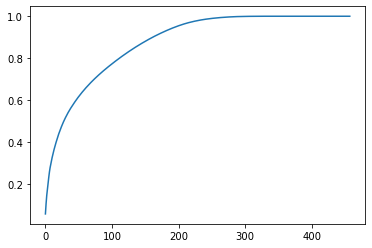

In [75]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#from below graph we can see around 220 PCA our 90% variance has been explained so we take PCA component value 220

In [76]:
pca=PCA(n_components=220)

In [77]:
x_train_trf=pca.fit_transform(x_train_std)

In [78]:
x_test_trf=pca.transform(x_test_std)

In [79]:
x_train_trf.shape

(3366, 220)

In [80]:
x_test_trf.shape

(842, 220)

In [81]:

# check xgboost version
import xgboost
print(xgboost.__version__)

1.6.0


In [82]:
!pip install xgboost

In [83]:
import xgboost

In [84]:
from xgboost import XGBRegressor


In [85]:
xgbr=XGBRegressor(tree_method='gpu_hist',objective= 'reg:squarederror',gpu_id=0)

In [86]:
parameter={'max_depth':[5],"n_estimators":[130],"eta":[0.04],"subsample":[0.7], "colsample_bytree":[0.8],"gamma":[0.1]
          }

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
grd1=GridSearchCV(estimator=xgbr,param_grid=parameter,cv=3,verbose=True)

In [89]:
grd1.fit(x_train_trf,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=0, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to...None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                             

In [90]:
grd1.best_params_

{'colsample_bytree': 0.8,
 'eta': 0.04,
 'gamma': 0.1,
 'max_depth': 5,
 'n_estimators': 130,
 'subsample': 0.7}

In [91]:
grd1.best_score_

0.5080969445780474

In [92]:
y_pred1=grd1.predict(x_test_trf)

In [93]:
from sklearn.metrics import r2_score,mean_squared_error

In [94]:
r2_score(y_test,y_pred1)

0.5062408436901801

In [95]:
mean_squared_error(y_test,y_pred1)

77.47635430694098

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


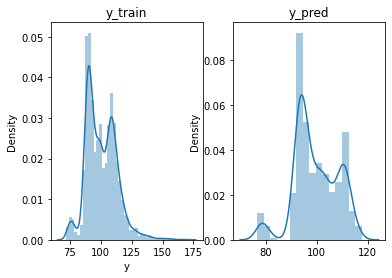

In [96]:
plt.subplot(1,2,1)
sns.distplot(train_df["y"])
plt.title("y_train")
plt.subplot(1,2,2)

sns.distplot(y_pred1)
plt.title("y_pred")
plt.show()

In [97]:
L

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [98]:
#Need to drop these columns from test_df as well because these columns are with varience 0

In [99]:

test_df=test_df.drop(L,axis=1)

In [100]:
test_df.shape

(4209, 458)

In [101]:
test_std_df=std.transform(test_df)# scaling

In [102]:
test_std_df.shape

(4209, 458)

In [103]:
test_df_trf=pca.transform(test_std_df)

In [104]:
test_df_trf.shape

(4209, 220)

In [106]:
y_pred2=grd1.predict(test_df_trf)

In [107]:
y_pred2

array([ 88.22259, 109.81917,  92.39757, ...,  96.78908, 109.86611,
        96.00518], dtype=float32)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


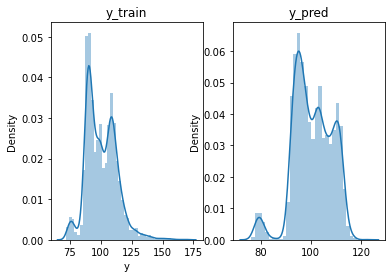

In [108]:
plt.subplot(1,2,1)
sns.distplot(train_df["y"])
plt.title("y_train")
plt.subplot(1,2,2)

sns.distplot(y_pred2)
plt.title("y_pred")
plt.show()

## This is a pictorial view for comparison between the target for training data-set and predicted target for testing data-set.

